<h1><center>Using Zach_OPTIMIZER to Check Spatial Resolution</center></h1>

In [1]:
#==========Imports==========
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time
from scipy import interpolate
import Zach_OPTIMIZER.EBMFunctions as opt

import Bell_EBM as ebm

In [2]:
#==========Set Up System==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

### Use CreateBaseline function to create a high spatial resolution baseline
##### We feed the star and planet into the function and also a fixed temporal resolution of 500, the function then returns us the times, maps, and lightcurve or the baseline

In [3]:
blt, blm, blc = opt.CreateBaseline(star, planet, temporal=500, spacial=128, orbit=1)

### Create a test array of 10 points
##### We keep a fixed temporal resolution of 500 to match the baseline, we test spatial resolution from 4 to 40

In [4]:
p = np.zeros(shape=((10),2))
p[:,0]=500
for i in range(0,10):
    p[i,1] = (i*4)+4
p

array([[500.,   4.],
       [500.,   8.],
       [500.,  12.],
       [500.,  16.],
       [500.,  20.],
       [500.,  24.],
       [500.,  28.],
       [500.,  32.],
       [500.,  36.],
       [500.,  40.]])

### Run tests on the data points we created
##### We pass in the planet, the star, the points we created, the baseline lightcurve, and the baseline times. We also set loops to 10 to get a nice average for time to compute. The function returns us the last created lightcurve (used mostly for debugging) and the data set associated with the test

In [5]:
lc, data = opt.RunTests(star, planet, p, blc, blt, loops=10)

In [6]:
data

array([[500.        ,   4.        ,  82.79013634, 539.25850286],
       [500.        ,   8.        ,  99.52232838, 259.06472442],
       [500.        ,  12.        , 126.1115551 , 166.28536137],
       [500.        ,  16.        , 165.74325562, 121.13895347],
       [500.        ,  20.        , 207.99818039,  93.84095634],
       [500.        ,  24.        , 258.1936121 ,  75.6010692 ],
       [500.        ,  28.        , 317.47479439,  62.49654557],
       [500.        ,  32.        , 384.92124081,  52.67760303],
       [500.        ,  36.        , 476.03664398,  45.01687438],
       [500.        ,  40.        , 567.76092052,  38.88896608]])

### Lets check some graphs!

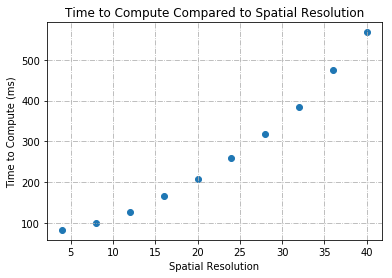

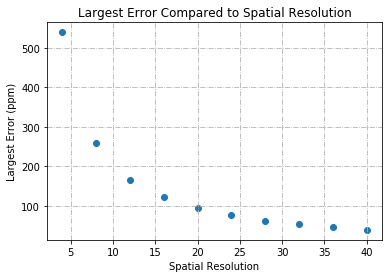

In [7]:
y = data[:,2]
x = data[:,1]
plt.scatter(x, y)
plt.xlabel("Spatial Resolution")
plt.ylabel("Time to Compute (ms)")
plt.title('Time to Compute Compared to Spatial Resolution')
plt.grid(True, linestyle='-.')
plt.show()

y = data[:,3]
x = data[:,1]
plt.scatter(x, y)
plt.xlabel("Spatial Resolution")
plt.ylabel("Largest Error (ppm)")
plt.title('Largest Error Compared to Spatial Resolution')
plt.grid(True, linestyle='-.')
plt.show()

<h1><center>Testing Lightcurves at Low Spatial Resolution</center></h1>


### Re-build the baseline, not necessary, but just incase the above one wasn't done

In [8]:
blt, blm, blc = opt.CreateBaseline(star,planet,spacial=128, orbit=1, temporal=500)

### Lets define some points where we want to test the function

In [9]:
d = np.zeros(shape=((7),2))
d[:,0]=500
for i in range(0,7):
    d[i,1] = (i*2)+4
d

array([[500.,   4.],
       [500.,   6.],
       [500.,   8.],
       [500.,  10.],
       [500.,  12.],
       [500.,  14.],
       [500.,  16.]])

### Run the test function on the points

In [10]:
lcs, data = opt.RunTests(star, planet, d, blc, blt)

In [11]:
data

array([[500.        ,   4.        ,  82.69691467, 539.25850286],
       [500.        ,   6.        ,  88.8838768 , 361.99842969],
       [500.        ,   8.        , 102.24199295, 259.06472442],
       [500.        ,  10.        , 111.07826233, 203.38165948],
       [500.        ,  12.        , 128.50093842, 166.28536137],
       [500.        ,  14.        , 144.77682114, 140.16108047],
       [500.        ,  16.        , 171.10776901, 121.13895347]])

### Lets check the graphs!
##### By looking at the differences between the baseline and the test runs we can see where the model is having difficulties

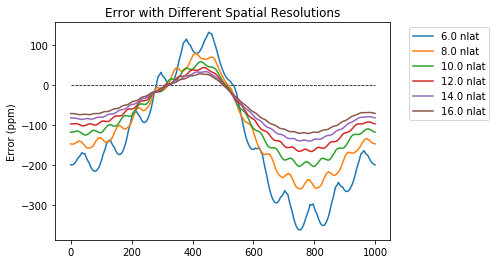

In [12]:
plt.title("Error with Different Spatial Resolutions")
plt.ylabel("Error (ppm)")
plt.plot((blc-blc)*1e6, 'k', linestyle = "--", lw=0.75)
for i in range (1,lcs.shape[0]):
    plt.plot((blc-lcs[i])*1e6, label=str(data[i,1])+" nlat")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")